Morning 
Instructions

Complete the following steps on the categorical columns in the dataset:

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already
Identify columns that over 85% missing values

Remove those columns from the dataframe

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')
Afternoon
Instructions
Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

Check for null values in the numerical columns.
Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
Use appropriate EDA technique where ever necessary.


## Importing libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('learningSet.csv')

C:\Users\31612\AppData\Local\Temp\ipykernel_25080\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
data.shape

(95412, 481)

## Selecting categorical columns

In [4]:
categorical = data.select_dtypes([object])

In [5]:
categorical.shape

(95412, 74)

## Checking for missing values and identifying columns with more than 85% 

In [6]:
nulls_percent_categorical = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_categorical.columns = ['column_name', 'nulls_percentage']
nulls_percent_categorical

,column_name,nulls_percentage
0,OSOURCE,0.000000
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.000000
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [7]:
def filter_nulls(df, threshold=0.25):
    nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshold]
    drop_columns_list = list(columns_above_threshold['column_name'])
    return drop_columns_list

In [8]:
filter_nulls(categorical, threshold=0.85) #there are no columns with more than 85% of missing values. 

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

## Appending OSOURCE and ZIP in an empty list of potential columns to drop

In [9]:
drop_list = []
drop_list.append(['OSOURCE', 'ZIP'])

## Reducing the number of unique values in the gender column

In [10]:
categorical['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [11]:
ml =list(categorical[(categorical['GENDER'].isin(['F','M']) == False) & (categorical['GENDER'].notna())]['GENDER'].index)
categorical.iloc[ml,list(categorical.columns).index("GENDER")] = "other"

In [12]:
print(categorical['GENDER'].value_counts(dropna = False))

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64


#Would this work?

categorical['GENDER'] = categorical['GENDER'].map({'A':'other',
                             'C':'other',
                             'J':'other', 'U': 'other', ' ': 'other'})

## Check for null values in the numerical columns.

In [13]:
numerical = data.select_dtypes(np.number)

In [14]:
numerical.shape

(95412, 407)

In [15]:
nulls_percent_numerical = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_numerical.columns = ['column_name', 'nulls_percentage']
nulls_percent_numerical

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [16]:
filter_nulls(numerical, threshold=0.25)

['NUMCHLD',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'WEALTH2',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_8',
 'RAMNT_9',
 'RAMNT_10',
 'RAMNT_11',
 'RAMNT_12',
 'RAMNT_13',
 'RAMNT_14',
 'RAMNT_15',
 'RAMNT_16',
 'RAMNT_17',
 'RAMNT_18',
 'RAMNT_19',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_22',
 'RAMNT_23',
 'RAMNT_24']

## Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA. Use appropriate EDA technique where ever necessary.

### GEOCODE

In [17]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [18]:
m_index = categorical[categorical['GEOCODE2'].notna()].index.tolist()
categorical = categorical.loc[m_index,:]
numerical = numerical.loc[m_index,:]

### WEALTH1

In [19]:
numerical['WEALTH1'].isna().sum()/len(numerical) 

0.4684298908480269

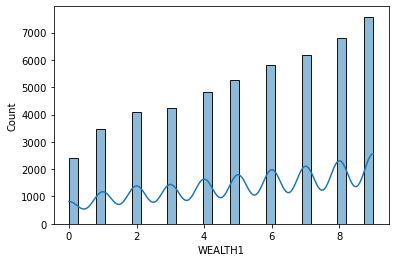

In [20]:
sns.histplot(numerical[numerical['WEALTH1'].isna()==False]['WEALTH1'],kde=True) 
plt.show()

There are too many missing values. In addition, there is another column wealth2 that seems to have the same information. We delete the column.

In [21]:
numerical.drop(['WEALTH1'], axis = 1)

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41

### ADI

In [22]:
numerical['ADI'].isna().sum()/len(numerical)

0.0

In [ ]:
sns.histplot(numerical[numerical['ADI'].isna()==False]['ADI'],kde=True) 
plt.show()

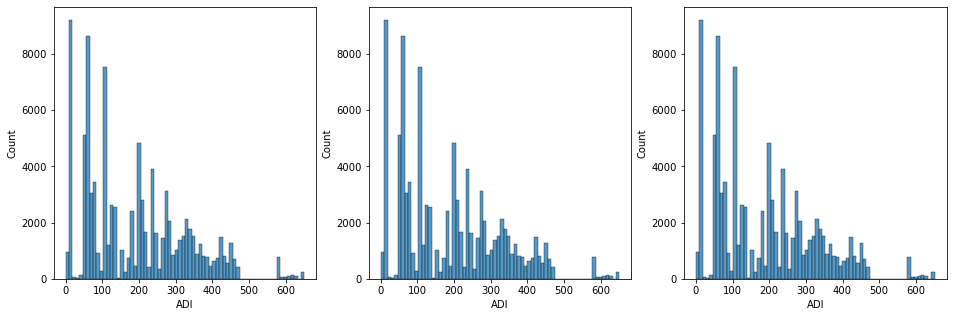

In [23]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['ADI'], ax = ax[0])
sns.histplot(numerical["ADI"].fillna(np.mean(numerical[numerical['ADI'].notna()]['ADI'])), ax = ax[1])
sns.histplot(numerical['ADI'].fillna(np.median(numerical[numerical['ADI'].notna()]['ADI'])),ax = ax[2])
plt.show()


In [24]:
np.median(numerical[numerical['ADI'].notna()]['ADI'])

175.0

In [25]:
np.mean(numerical[numerical['ADI'].notna()]['ADI'])

187.35640218303945

In [ ]:
#numerical['ADI'] = numerical["ADI"].fillna(np.median(numerical['ADI']))

We can replace the missing values with the mean or the median, it will not change the distribution significantly, as there are very few missing values.

### DMA

In [26]:
numerical['DMA'].isna().sum()/len(numerical)

0.0

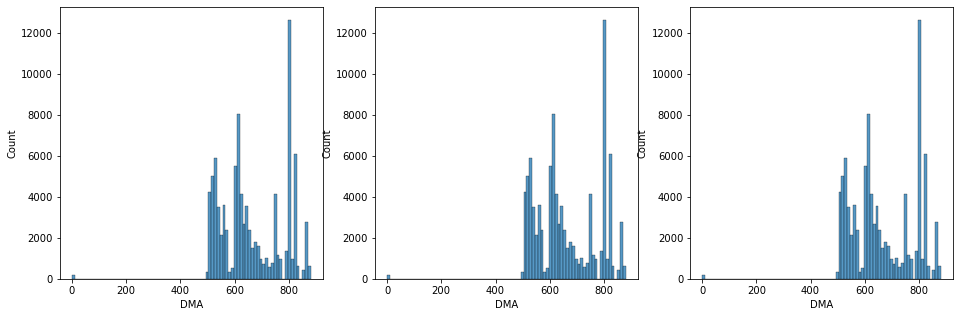

In [27]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['DMA'], ax = ax[0])
sns.histplot(numerical["DMA"].fillna(np.mean(numerical[numerical['DMA'].notna()]['DMA'])), ax = ax[1])
sns.histplot(numerical['DMA'].fillna(np.median(numerical[numerical['DMA'].notna()]['DMA'])),ax = ax[2])
plt.show()


We could replace the missing values with the mean or the median, it will not change the distribution significantly, as there are very few missing values.
m = numerical['DMA'].mean()[0]
numerical['DMA'] = numerical['DMA'].fillna(m) 

In [ ]:
#numerical['DMA'] = numerical["DMA"].fillna(np.median(numerical['DMA']))

### MSA

In [28]:
numerical['MSA'].isna().sum()/len(numerical)

0.0

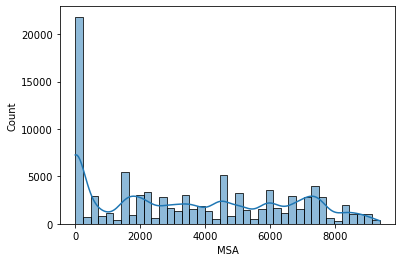

In [29]:
sns.histplot(numerical[numerical['MSA'].isna()==False]['MSA'],kde=True) 
plt.show()

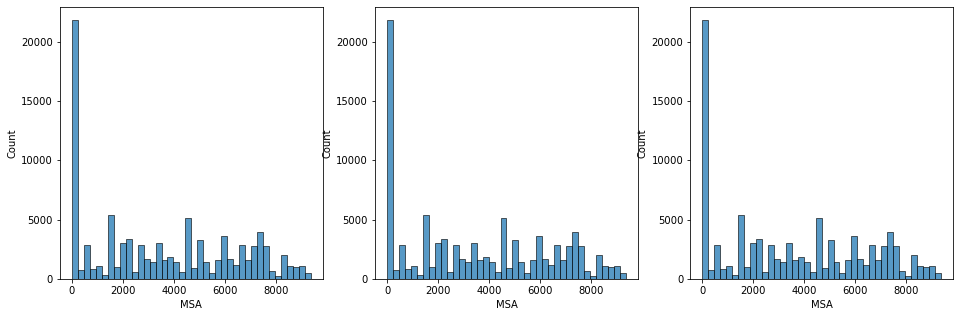

In [30]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['MSA'], ax = ax[0])
sns.histplot(numerical["MSA"].fillna(np.mean(numerical[numerical['MSA'].notna()]['MSA'])), ax = ax[1])
sns.histplot(numerical['MSA'].fillna(np.median(numerical[numerical['MSA'].notna()]['MSA'])),ax = ax[2])
plt.show()


In [ ]:
#numerical['MSA'] = numerical["MSA"].fillna(np.median(numerical['MSA']))

In [31]:
numerical[['MSA', 'DMA', 'ADI']].isna().sum(axis=1).value_counts()

0    95280
dtype: int64

In [32]:
numerical[['MSA', 'DMA', 'ADI']].isna()

,MSA,DMA,ADI
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95407,False,False,False
95408,False,False,False
95409,False,False,False
95410,False,False,False


MSA, DMA and ADI had 132 rows with the same missing values that disappear once GEOCODE is dropped/.